# **Titanic Shipwreck.**
**Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

**Libraries**

In [416]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the data**

In [417]:
titanic_train = pd.read_csv('train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [418]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [419]:
passengers = titanic_train.copy()

**Check for missing values**

In [420]:
def print_missing_values(dataset):
    
    df = pd.DataFrame(dataset)

    missing_values_count = df.isnull().sum()
    missing_values_percentage = (missing_values_count / len(df)) * 100

    missing_values_table = pd.DataFrame({
        'Count': missing_values_count,
        'Percentage': missing_values_percentage
    })

    missing_values_table = missing_values_table[missing_values_table['Count'] > 0]

    print("Columns with missing values:")
    print()
    print(missing_values_table)

print_missing_values(titanic_train)

Columns with missing values:

          Count  Percentage
Age         177   19.865320
Cabin       687   77.104377
Embarked      2    0.224467


**Check for duplicates**

In [421]:
titanic_train.duplicated().sum()

0

In [422]:
def find_duplicates(data):

  df = pd.DataFrame(data)

  duplicate_rows = df[df.duplicated()]

  print(duplicate_rows)

find_duplicates(titanic_train)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## **Initial EDA**

In [423]:
# create a data report
#profile = ProfileReport(titanic_train)

#profile.to_file('train_report.html')

From the data report, `Cabin` has a high number of  missing values thus it'll be dropped.<br>
`Age` has 177 missing values and this rows will be dropped.<br>
`Embarked` has only 2 missing values which will be filled with the mode.

# **Cleaning**

In [424]:
# dropping column
titanic_train.drop(['Cabin','Fare','Ticket','Name', 'PassengerId'], axis=1, inplace=True)

# dropping missing values
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)
titanic_train["Age"] = titanic_train["Age"].astype(int)

In [425]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


# **EDA**

In [426]:
def distribution(df, col):
    sns.histplot(df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

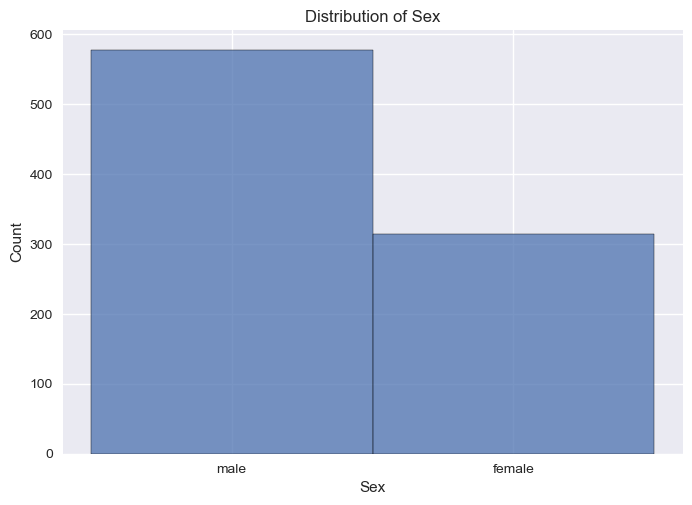

In [427]:
# Distribution of features in the clean data
distribution(titanic_train, 'Sex')

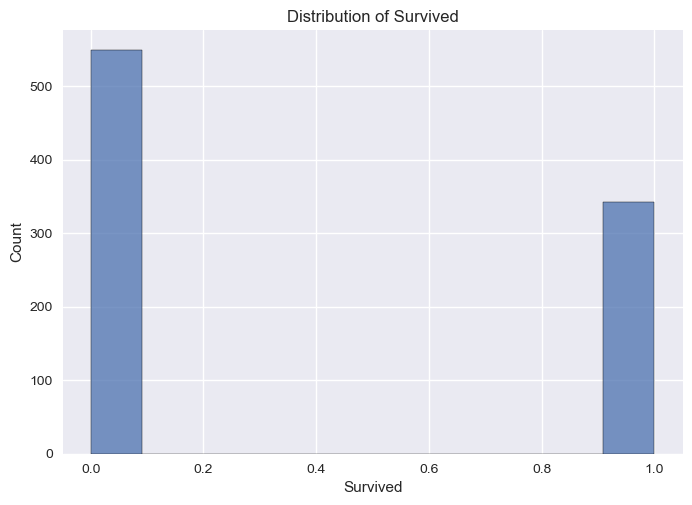

In [428]:
distribution(titanic_train, 'Survived')

In [429]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [430]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


# **Feature Engineering**

In [431]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S
887,1,1,female,19,0,0,S
888,0,3,female,29,1,2,S
889,1,1,male,26,0,0,C


In [432]:
titanic_train.dtypes

Survived     int64
Pclass       int64
Sex         object
Age          int32
SibSp        int64
Parch        int64
Embarked    object
dtype: object

In [433]:
titanic_train['Pclass'] = titanic_train["Pclass"].replace([1,2,3], ['Upper', 'Middle', 'Lower'])
titanic_train['Embarked'] = titanic_train["Embarked"].replace(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])

In [434]:
titanic_train.Embarked.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [435]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [436]:
# One-Hot Encode Categorical Columns
# from sklearn.preprocessing import OneHotEncoder

# cat_columns = ['Pclass', 'Sex', 'Embarked']
# ohe = OneHotEncoder(categories = 'auto', sparse = False, handle_unknown='ignore')

# ohe.fit(titanic_train[cat_columns])

# new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# columns = pd.DataFrame(ohe.fit_transform(titanic_train[cat_columns]), columns = new_cat_columns, index=titanic_train.index)

# titanic_train = pd.concat([titanic_train.drop(cat_columns, axis=1), columns], axis=1)

In [437]:
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,Lower,male,22,1,0,Southampton
1,1,Upper,female,38,1,0,Cherbourg
2,1,Lower,female,26,0,0,Southampton
3,1,Upper,female,35,1,0,Southampton
4,0,Lower,male,35,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,Middle,male,27,0,0,Southampton
887,1,Upper,female,19,0,0,Southampton
888,0,Lower,female,29,1,2,Southampton
889,1,Upper,male,26,0,0,Cherbourg


In [438]:
titanic_train = pd.get_dummies(titanic_train)
titanic_train

,Survived,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,0,22,1,0,1,0,0,0,1,0,0,1
1,1,38,1,0,0,0,1,1,0,1,0,0
2,1,26,0,0,1,0,0,1,0,0,0,1
3,1,35,1,0,0,0,1,1,0,0,0,1
4,0,35,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,0,0,0,1,0,0,1,0,0,1
887,1,19,0,0,0,0,1,1,0,0,0,1
888,0,29,1,2,1,0,0,1,0,0,0,1
889,1,26,0,0,0,0,1,0,1,1,0,0


**Normalization**

In [439]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# columns_to_scale = ['Age', 'SibSp', 'Parch']


# titanic_train[columns_to_scale] = scaler.fit_transform(titanic_train[columns_to_scale])

# titanic_train

## **MODELING**

In [440]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [441]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model

In [442]:
X_test

,Age,SibSp,Parch,Pclass_Lower,Pclass_Middle,Pclass_Upper,Sex_female,Sex_male,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
709,29,1,1,1,0,0,0,1,1,0,0
439,31,0,0,0,1,0,0,1,0,0,1
840,20,0,0,1,0,0,0,1,0,0,1
720,6,0,1,0,1,0,1,0,0,0,1
39,14,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
433,17,0,0,1,0,0,0,1,0,0,1
773,29,0,0,1,0,0,0,1,1,0,0
25,38,1,5,1,0,0,1,0,0,0,1
84,17,0,0,0,1,0,1,0,0,0,1


In [443]:
passenger_709 = passengers[passengers['PassengerId'] == 10]
passenger_709

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [444]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [445]:
logit.score(X_test, y_test)

0.8100558659217877

In [446]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

In [447]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

In [448]:
def plot_confusion(y_test, y_predicted):
    labels = {0: 'Dead', 1: 'Survived'}
    labels = [labels[key] for key in sorted(labels.keys())]
    cf = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels=labels)


    disp.plot()
    plt.grid(False)


    plt.show()

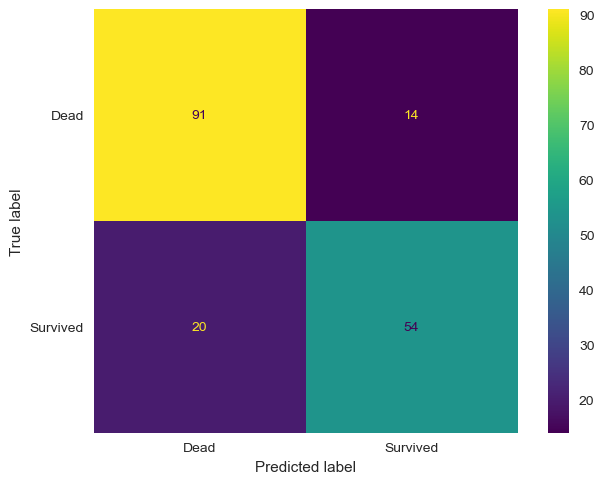

In [449]:
plot_confusion(y_test, y_pred)

In [450]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [451]:
def plot_roc(model, X_train, y_train, X_test, y_test):
    y_score = model.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize = (8,5))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

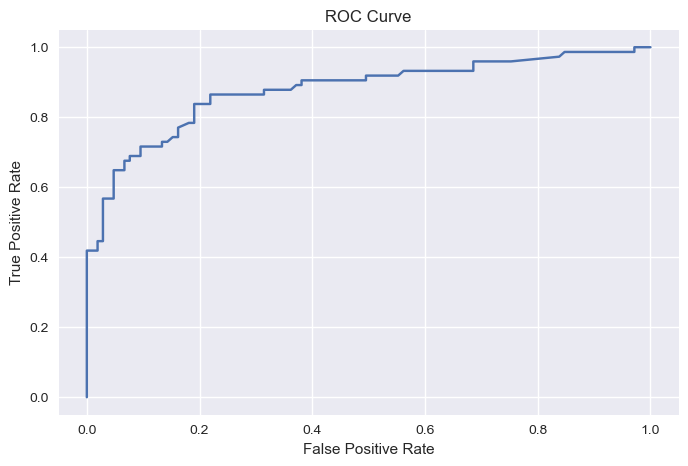

In [452]:
plot_roc(logit, X_train, y_train, X_test, y_test)

### Decision Trees

In [453]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [454]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_pred_clf

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [455]:
accuracy = accuracy_score(y_test, y_pred_clf)
accuracy

0.776536312849162

In [456]:
report = classification_report(y_test, y_pred_clf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



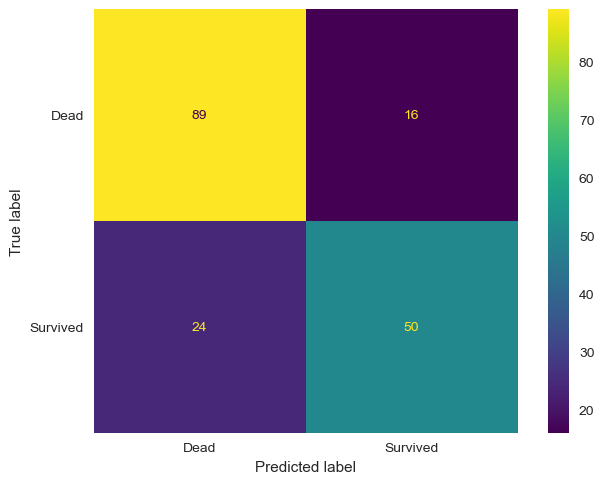

In [457]:
plot_confusion(y_test, y_pred_clf)

In [458]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predict = xgb.predict(X_test)
predict

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [459]:
xgb.score(X_test, y_test)

0.8100558659217877

In [460]:
accuracy = accuracy_score(y_test, predict)
accuracy

0.8100558659217877

In [461]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

pred = cbc.predict(X_test)
pred

Learning rate set to 0.008911
0:	learn: 0.6873048	total: 5.59ms	remaining: 5.58s
1:	learn: 0.6819983	total: 10.6ms	remaining: 5.28s
2:	learn: 0.6756575	total: 14.3ms	remaining: 4.74s
3:	learn: 0.6704997	total: 18.4ms	remaining: 4.58s
4:	learn: 0.6651599	total: 25.3ms	remaining: 5.03s
5:	learn: 0.6592497	total: 31ms	remaining: 5.14s
6:	learn: 0.6552471	total: 34.7ms	remaining: 4.92s
7:	learn: 0.6495724	total: 39.6ms	remaining: 4.91s
8:	learn: 0.6449623	total: 43.4ms	remaining: 4.78s
9:	learn: 0.6403689	total: 48.2ms	remaining: 4.77s
10:	learn: 0.6376150	total: 50.2ms	remaining: 4.51s
11:	learn: 0.6337678	total: 54.7ms	remaining: 4.5s
12:	learn: 0.6286368	total: 58.6ms	remaining: 4.45s
13:	learn: 0.6237703	total: 62.2ms	remaining: 4.38s
14:	learn: 0.6190687	total: 66.7ms	remaining: 4.38s
15:	learn: 0.6143825	total: 72.1ms	remaining: 4.43s
16:	learn: 0.6100148	total: 75.5ms	remaining: 4.37s
17:	learn: 0.6055323	total: 82.3ms	remaining: 4.49s
18:	learn: 0.6012643	total: 87.6ms	remaining: 4

541:	learn: 0.3501313	total: 2.29s	remaining: 1.94s
542:	learn: 0.3500165	total: 2.3s	remaining: 1.93s
543:	learn: 0.3499480	total: 2.3s	remaining: 1.93s
544:	learn: 0.3498452	total: 2.31s	remaining: 1.93s
545:	learn: 0.3497621	total: 2.31s	remaining: 1.92s
546:	learn: 0.3497195	total: 2.31s	remaining: 1.92s
547:	learn: 0.3496593	total: 2.32s	remaining: 1.91s
548:	learn: 0.3496348	total: 2.32s	remaining: 1.91s
549:	learn: 0.3494181	total: 2.32s	remaining: 1.9s
550:	learn: 0.3490894	total: 2.33s	remaining: 1.9s
551:	learn: 0.3490805	total: 2.33s	remaining: 1.89s
552:	learn: 0.3490219	total: 2.33s	remaining: 1.88s
553:	learn: 0.3489523	total: 2.33s	remaining: 1.88s
554:	learn: 0.3489217	total: 2.34s	remaining: 1.88s
555:	learn: 0.3488334	total: 2.34s	remaining: 1.87s
556:	learn: 0.3487806	total: 2.35s	remaining: 1.86s
557:	learn: 0.3487409	total: 2.35s	remaining: 1.86s
558:	learn: 0.3487282	total: 2.35s	remaining: 1.85s
559:	learn: 0.3485769	total: 2.35s	remaining: 1.85s
560:	learn: 0.34

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [462]:
cbc.score(X_test, y_test)

0.8212290502793296

In [463]:
accur = accuracy_score(y_test, pred)
accur

0.8212290502793296

In [464]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train, y_train)

In [465]:
cbc2 = cbc.fit(X_smote, y_smote)

prediction = cbc2.predict(X_test)
prediction

Learning rate set to 0.009793
0:	learn: 0.6861863	total: 4.52ms	remaining: 4.52s
1:	learn: 0.6795167	total: 9.85ms	remaining: 4.91s
2:	learn: 0.6721432	total: 13.3ms	remaining: 4.42s
3:	learn: 0.6677378	total: 16.7ms	remaining: 4.17s
4:	learn: 0.6620290	total: 20ms	remaining: 3.98s
5:	learn: 0.6550553	total: 26.4ms	remaining: 4.38s
6:	learn: 0.6505366	total: 31.5ms	remaining: 4.46s
7:	learn: 0.6438146	total: 35.4ms	remaining: 4.39s
8:	learn: 0.6376231	total: 40.1ms	remaining: 4.42s
9:	learn: 0.6330260	total: 48.6ms	remaining: 4.81s
10:	learn: 0.6299553	total: 52.8ms	remaining: 4.75s
11:	learn: 0.6258078	total: 58ms	remaining: 4.78s
12:	learn: 0.6200005	total: 61.3ms	remaining: 4.65s
13:	learn: 0.6143610	total: 66.2ms	remaining: 4.66s
14:	learn: 0.6086145	total: 70.9ms	remaining: 4.66s
15:	learn: 0.6031522	total: 76.5ms	remaining: 4.7s
16:	learn: 0.5996713	total: 84.3ms	remaining: 4.87s
17:	learn: 0.5945164	total: 88.9ms	remaining: 4.85s
18:	learn: 0.5899594	total: 96.7ms	remaining: 4.9

76:	learn: 0.4501361	total: 382ms	remaining: 4.58s
77:	learn: 0.4486951	total: 387ms	remaining: 4.58s
78:	learn: 0.4477510	total: 392ms	remaining: 4.56s
79:	learn: 0.4463648	total: 395ms	remaining: 4.54s
80:	learn: 0.4450439	total: 399ms	remaining: 4.53s
81:	learn: 0.4442091	total: 403ms	remaining: 4.51s
82:	learn: 0.4433196	total: 407ms	remaining: 4.49s
83:	learn: 0.4418824	total: 412ms	remaining: 4.49s
84:	learn: 0.4403531	total: 416ms	remaining: 4.47s
85:	learn: 0.4396004	total: 420ms	remaining: 4.46s
86:	learn: 0.4385564	total: 424ms	remaining: 4.45s
87:	learn: 0.4378965	total: 428ms	remaining: 4.43s
88:	learn: 0.4371909	total: 432ms	remaining: 4.42s
89:	learn: 0.4365580	total: 441ms	remaining: 4.46s
90:	learn: 0.4352544	total: 447ms	remaining: 4.47s
91:	learn: 0.4346400	total: 453ms	remaining: 4.47s
92:	learn: 0.4334394	total: 456ms	remaining: 4.45s
93:	learn: 0.4322596	total: 464ms	remaining: 4.47s
94:	learn: 0.4318981	total: 466ms	remaining: 4.44s
95:	learn: 0.4311440	total: 481

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [466]:
cbc2.score(X_test, y_test)

0.8324022346368715

In [471]:
titanic_test = pd.read_csv('test.csv')
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test = 

In [472]:
titanic_prediction = logit.predict(titanic_test)
titanic_test['Survived'] = titanic_prediction



ValueError: could not convert string to float: 'Kelly, Mr. James'